In [ ]:
import pandas as pd

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [ ]:
path = "/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv"
df = pd.read_csv(path)
df.head(20)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
5,504313,55,0,13.7,6,14.05.21,12.467,1,364,1,0,0
6,504314,17,1,30.7,6,09.01.21,2.456,0,654,0,0,0
7,504315,30,1,8.1,7,28.03.21,6.561,3,1011,0,0,0
8,504316,51,0,18.0,4,04.08.21,11.880,0,312,3,1,0
9,504317,63,1,19.2,4,06.10.21,11.904,3,828,0,0,0


In [ ]:
#Data structure preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [ ]:
df.shape

(65796, 12)

In [ ]:
#checking for null and missing valuesdf.
df.isnull().sum()

,0
Customer_id,0
Age,0
Gender,0
Revenue_Total,0
N_Purchases,0
Purchase_DATE,0
Purchase_VALUE,0
Pay_Method,0
Time_Spent,0
Browser,0


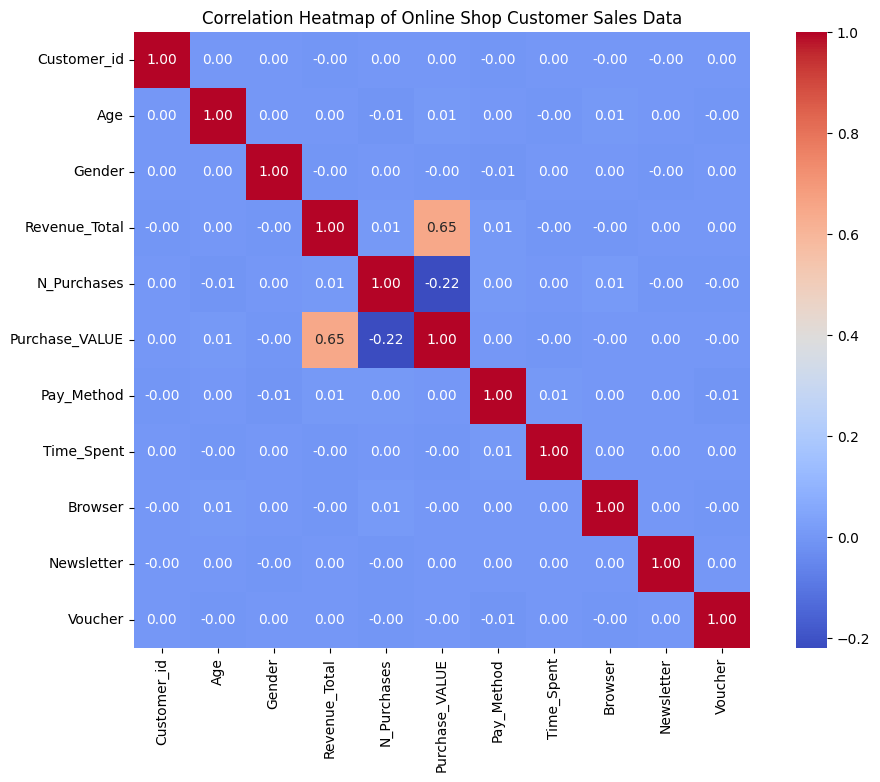

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv')

df['Purchase_DATE'] = pd.to_datetime(data['Purchase_DATE'], format='%d.%m.%y', errors='coerce')

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Online Shop Customer Sales Data')
plt.show()


In [ ]:
#remove duplicates based on all columns
df.drop_duplicates(inplace = True)

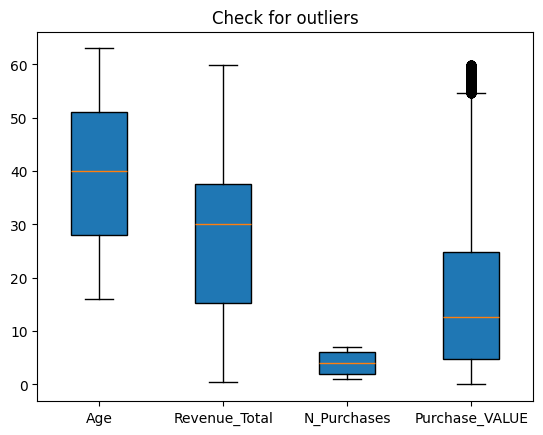

In [ ]:
box_plot_data = df.drop(columns = ["Customer_id", "Gender", "Purchase_DATE", "Pay_Method","Browser", "Newsletter", "Voucher", "Time_Spent"])
plt.boxplot(box_plot_data, patch_artist = True, labels = ["Age", "Revenue_Total", "N_Purchases", "Purchase_VALUE"])
plt.title("Check for outliers")
plt.show()

In [ ]:
summary = df.describe()
summary

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


<ipython-input-17-8821b0a6e697>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({0:"Male", 1:"Female"}, inplace = True)


<Axes: title={'center': 'Gender Count'}, xlabel='Gender', ylabel='count'>

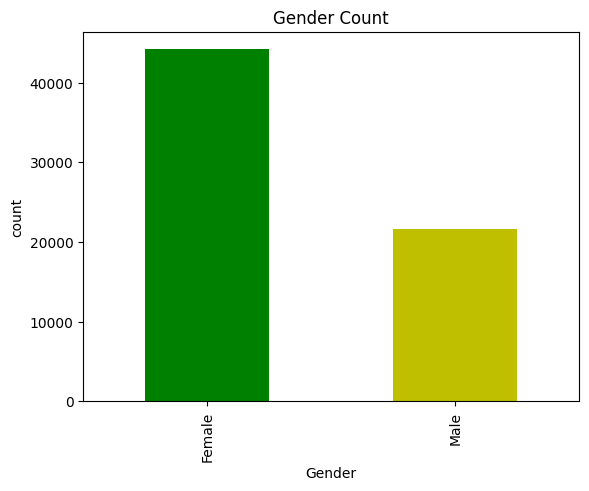

In [ ]:
df["Gender"].replace({0:"Male", 1:"Female"}, inplace = True)
df["Gender"].value_counts().plot(kind = "bar",ylabel = "count",xlabel = "Gender", color = ["g", "y"], title = "Gender Count")

<ipython-input-19-f02384ed77d1>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = melted_gender,x = "Gender", y = "Value",hue = "Variable", ci = None, palette="Set2")


Text(0.5, 1.0, 'Revenue, Purchase, and Gross Margin by Gender')

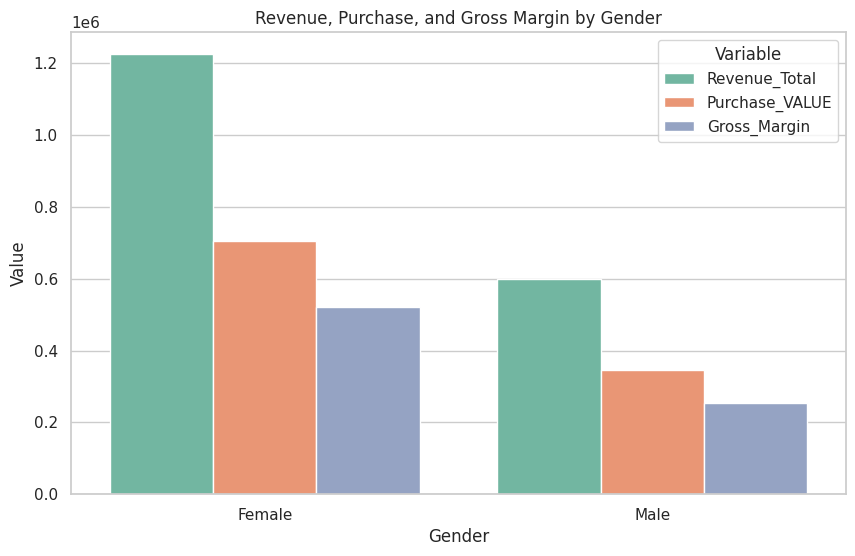

In [ ]:
gender_grp = df.groupby("Gender")[["Revenue_Total","Purchase_VALUE"]].sum().reset_index()
gender_grp["Gross_Margin"]  = (gender_grp["Revenue_Total"] - gender_grp["Purchase_VALUE"])
melted_gender = pd.melt(gender_grp,id_vars="Gender", var_name="Variable",value_name="Value")

sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.barplot(data = melted_gender,x = "Gender", y = "Value",hue = "Variable", ci = None, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Value")
plt.title("Revenue, Purchase, and Gross Margin by Gender")

<ipython-input-20-34497b38a15e>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = melted_browser,x = "Browser", y = "Value",hue = "Variable", ci = None, palette="Set3")


Text(0.5, 1.0, 'Revenue, Purchase, and Gross Margin by Browser Type')

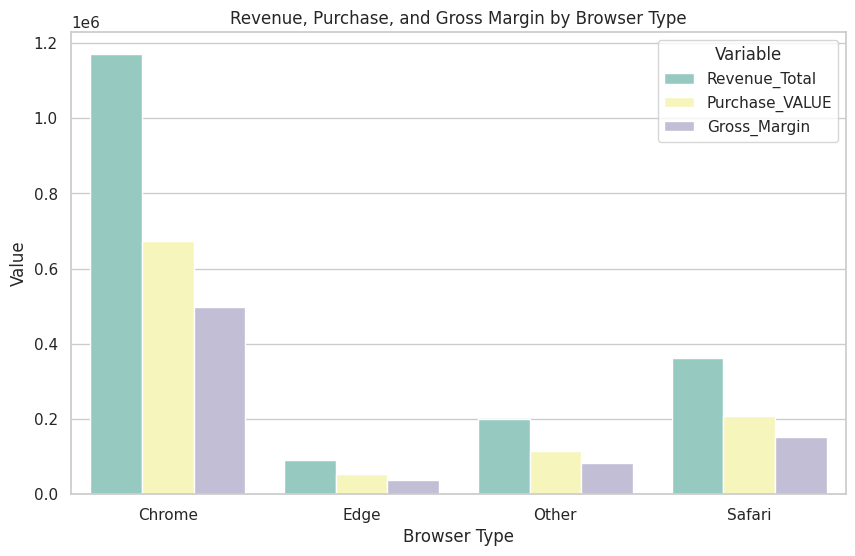

In [ ]:
browser_grp = df.groupby("Browser")[["Revenue_Total","Purchase_VALUE"]].sum().reset_index()
browser_grp["Gross_Margin"]  = (browser_grp["Revenue_Total"] - browser_grp["Purchase_VALUE"])
melted_browser = pd.melt(browser_grp,id_vars="Browser", var_name="Variable",value_name="Value")

sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.barplot(data = melted_browser,x = "Browser", y = "Value",hue = "Variable", ci = None, palette="Set3")
plt.xlabel("Browser Type")
plt.ylabel("Value")
plt.title("Revenue, Purchase, and Gross Margin by Browser Type")

<ipython-input-21-e9bd34486381>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = melted_payment_method,x = "Pay_Method", y = "Value",hue = "Variable", ci = None, palette="Set1")


Text(0.5, 1.0, 'Revenue, Purchase, and Gross Margin by Payment Method')

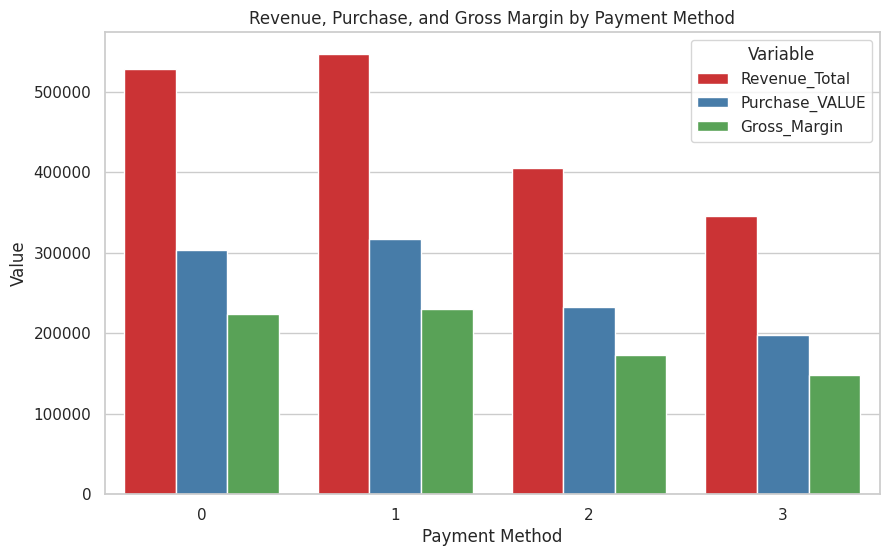

In [ ]:
Pay_method_grp = df.groupby("Pay_Method")[["Revenue_Total","Purchase_VALUE"]].sum().reset_index()
Pay_method_grp["Gross_Margin"]  = (Pay_method_grp["Revenue_Total"] - Pay_method_grp["Purchase_VALUE"])
melted_payment_method = pd.melt(Pay_method_grp,id_vars="Pay_Method", var_name="Variable",value_name="Value")

sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.barplot(data = melted_payment_method,x = "Pay_Method", y = "Value",hue = "Variable", ci = None, palette="Set1")
plt.xlabel("Payment Method")
plt.ylabel("Value")
plt.title("Revenue, Purchase, and Gross Margin by Payment Method")

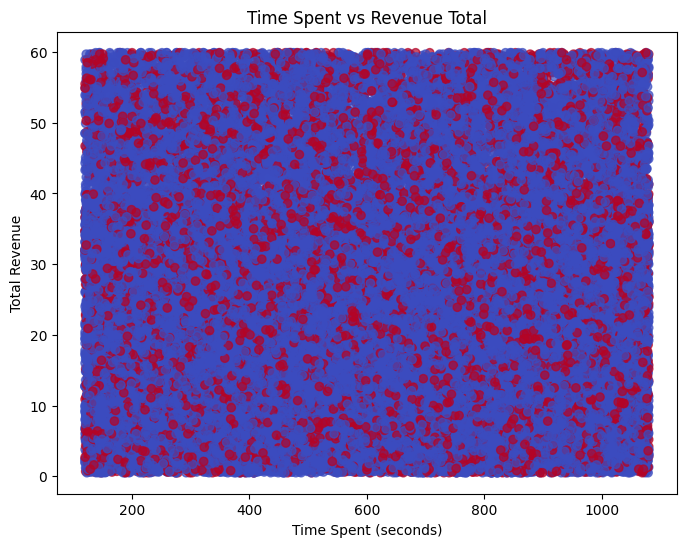

In [ ]:
# @title Time Spent vs Revenue Total

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Time_Spent'], df['Revenue_Total'], c=df['Voucher'], cmap='coolwarm', alpha=0.7)
plt.title('Time Spent vs Revenue Total')
plt.xlabel('Time Spent (seconds)')
_ = plt.ylabel('Total Revenue')

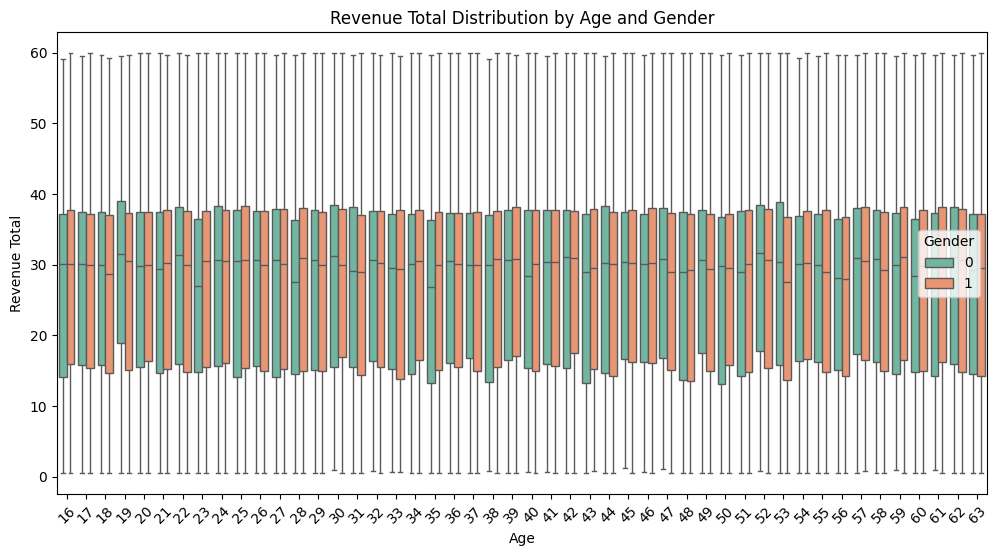

In [ ]:
# @title Revenue Total Distribution by Age and Gender

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Revenue_Total', hue='Gender', data=df, palette='Set2')
plt.title('Revenue Total Distribution by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Revenue Total')
_ = plt.xticks(rotation=45)

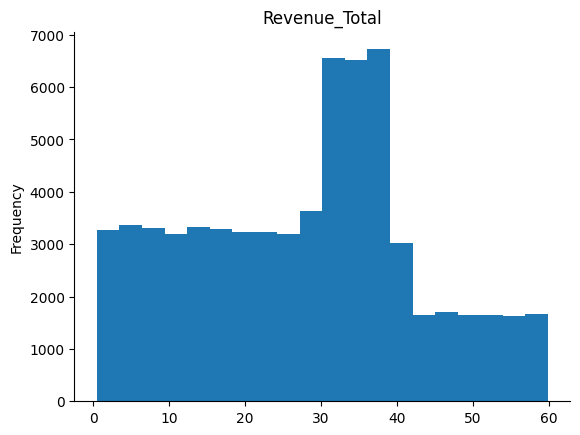

In [ ]:
# @title Revenue_Total

from matplotlib import pyplot as plt
df['Revenue_Total'].plot(kind='hist', bins=20, title='Revenue_Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

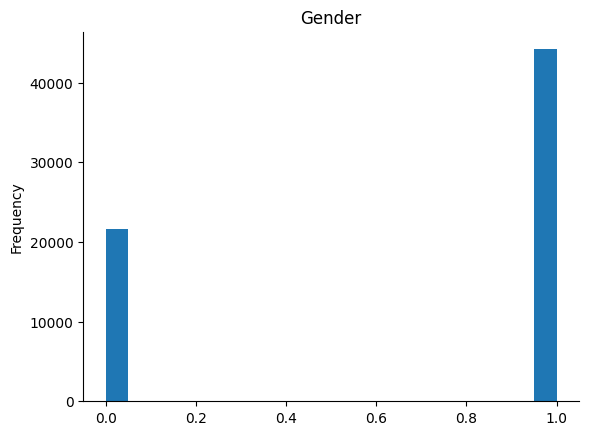

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
df['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

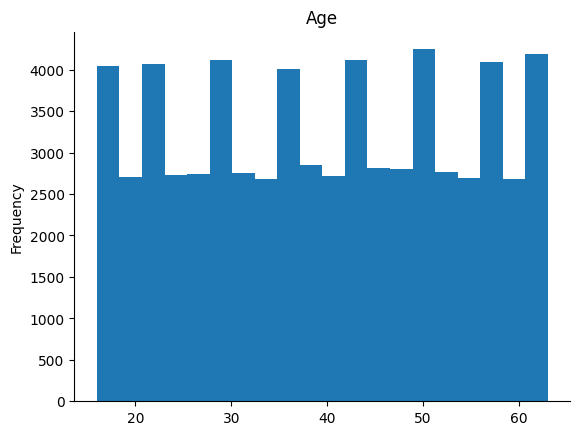

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

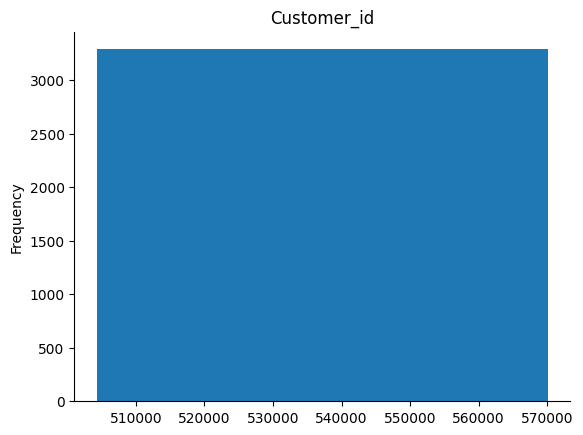

In [ ]:
# @title Customer_id

from matplotlib import pyplot as plt
df['Customer_id'].plot(kind='hist', bins=20, title='Customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Check for missing values
df.isnull().sum()

# If there are missing values, you can handle them using these methods:
# a) Imputation (replace missing values with mean, median, or mode)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)
# b) Removal of rows with missing values
# df.dropna(inplace=True)

,0
Customer_id,0
Age,0
Gender,0
Revenue_Total,0
N_Purchases,0
Purchase_DATE,0
Purchase_VALUE,0
Pay_Method,0
Time_Spent,0
Browser,0
